In [1]:
from keras.utils import np_utils
from keras import callbacks as cb
from keras.optimizers import Adam
from keras.models import load_model, Model
from keras.layers import *
from keras.models import Sequential
from keras import regularizers as rg
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
from sklearn.preprocessing import LabelBinarizer

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import random
from python.dataloader import loader
%matplotlib inline
%load_ext autoreload
%autoreload 2

C:\Anaconda\envs\chatbot\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
images, labels = zip(*list(loader('python/images_background')))
images = np.expand_dims(images, axis=-1)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [00:07<00:00,  3.76it/s]


In [3]:
labels[0], images[0].shape

(('Alphabet_of_the_Magi', 'character01'), (105, 105, 1))

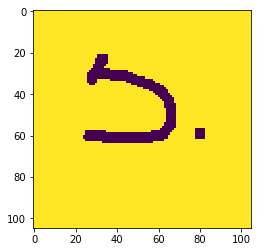

In [8]:
plt.imshow(np.squeeze(images[100]))

In [5]:
main_labels, sub_labels= [x[0] for x in labels], [x[1] for x in labels]
main_labels

['Alphabet_of_the_Magi',
 'Alphabet_of_the_Magi',
 'Alphabet_of_the_Magi',
 'Alphabet_of_the_Magi',
 'Alphabet_of_the_Magi',
 'Alphabet_of_the_Magi',
 'Alphabet_of_the_Magi',
 'Alphabet_of_the_Magi',
 'Alphabet_of_the_Magi',
 'Alphabet_of_the_Magi',
 'Alphabet_of_the_Magi',
 'Alphabet_of_the_Magi',
 'Alphabet_of_the_Magi',
 'Alphabet_of_the_Magi',
 'Alphabet_of_the_Magi',
 'Alphabet_of_the_Magi',
 'Alphabet_of_the_Magi',
 'Alphabet_of_the_Magi',
 'Alphabet_of_the_Magi',
 'Alphabet_of_the_Magi',
 'Alphabet_of_the_Magi',
 'Alphabet_of_the_Magi',
 'Alphabet_of_the_Magi',
 'Alphabet_of_the_Magi',
 'Alphabet_of_the_Magi',
 'Alphabet_of_the_Magi',
 'Alphabet_of_the_Magi',
 'Alphabet_of_the_Magi',
 'Alphabet_of_the_Magi',
 'Alphabet_of_the_Magi',
 'Alphabet_of_the_Magi',
 'Alphabet_of_the_Magi',
 'Alphabet_of_the_Magi',
 'Alphabet_of_the_Magi',
 'Alphabet_of_the_Magi',
 'Alphabet_of_the_Magi',
 'Alphabet_of_the_Magi',
 'Alphabet_of_the_Magi',
 'Alphabet_of_the_Magi',
 'Alphabet_of_the_Magi',


In [5]:
encoder = LabelBinarizer()
enc_main_labels = encoder.fit_transform(main_labels)
output_num = len(np.unique(main_labels))

In [6]:
output_num

30

In [7]:
def conv_model():
    inp = Input(shape=(105, 105, 1))
    x = Conv2D(kernel_size=(3,3), filters=32, padding='valid', activation='relu')(inp)
    x = MaxPooling2D()(x)
    x = Conv2D(kernel_size=(3,3), filters=128, activation='relu')(x)
    x = MaxPooling2D()(x)
    x = Conv2D(kernel_size=(5,5), strides=(2,2), filters=128, activation='relu')(x)
    x = MaxPooling2D()(x)
    y = Conv2D(kernel_size=(5,5), strides=(2,2), filters=128, activation='relu')(x)
    model = Model(inputs=inp, outputs=y)
    return model

def class_model(inp):
    x = Flatten()(inp)
    x = BatchNormalization()(x)
    x = Dense(128, activation='relu')(x)
    x = Dense(output_num, activation='softmax')(x)
    return x

In [8]:
bottleneck_model = conv_model()
bottleneck_model.trainable = False
inp = Input(shape=(105,105,1))
features = bottleneck_model(inp)
prediction = class_model(features)
full_model = Model(inputs=inp, outputs=prediction)

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [9]:
adam = Adam()
full_model.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [10]:
full_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 105, 105, 1)       0         
_________________________________________________________________
model_1 (Model)              (None, 1, 1, 128)         856768    
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 128)               512       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 30)                3870      
Total params: 877,662
Trainable params: 20,638
Non-trainable params: 857,024
_________________________________________________________________

In [63]:
full_model.fit(x=images, y=enc_main_labels, batch_size=32, epochs=1, validation_split=0.1)

Train on 17352 samples, validate on 1928 samples
Epoch 1/1
 5568/17352 [========>.....................] - ETA: 3:50:35 - loss: 3.3718 - acc: 0.06 - ETA: 1:55:37 - loss: 3.3591 - acc: 0.04 - ETA: 1:17:12 - loss: 3.3527 - acc: 0.05 - ETA: 58:00 - loss: 3.3653 - acc: 0.0469 - ETA: 46:28 - loss: 3.3509 - acc: 0.05 - ETA: 38:48 - loss: 3.3291 - acc: 0.05 - ETA: 33:18 - loss: 3.3216 - acc: 0.04 - ETA: 29:11 - loss: 3.3085 - acc: 0.05 - ETA: 25:59 - loss: 3.3021 - acc: 0.05 - ETA: 23:25 - loss: 3.2810 - acc: 0.06 - ETA: 21:19 - loss: 3.2785 - acc: 0.06 - ETA: 19:34 - loss: 3.2547 - acc: 0.06 - ETA: 18:06 - loss: 3.2503 - acc: 0.07 - ETA: 16:50 - loss: 3.2288 - acc: 0.07 - ETA: 15:44 - loss: 3.2130 - acc: 0.08 - ETA: 14:46 - loss: 3.1906 - acc: 0.09 - ETA: 13:55 - loss: 3.1682 - acc: 0.10 - ETA: 13:10 - loss: 3.1490 - acc: 0.10 - ETA: 12:29 - loss: 3.1281 - acc: 0.11 - ETA: 11:53 - loss: 3.1152 - acc: 0.12 - ETA: 11:20 - loss: 3.0994 - acc: 0.12 - ETA: 10:50 - loss: 3.0878 - acc: 0.13 - ETA: 1

KeyboardInterrupt: 